In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_1samp,ttest_ind, chi2_contingency
from warnings import filterwarnings
filterwarnings('ignore')

# Problem 1

## Problem Statement
### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
wholesale = pd.read_csv('Wholesale+Customers+Data.csv')
wholesale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [3]:
wholesale.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

#### Q-1.1 Use methods of descriptive statistics to summarize data. 
###### 1.1.1 Which Region and which Channel spent the most? 
###### 1.1.2 Which Region and which Channel spent the least?

In [4]:
wholesale.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


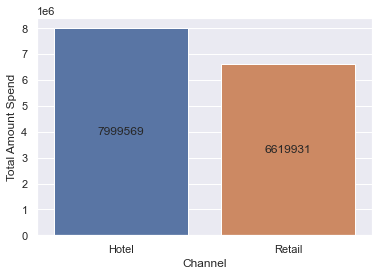

In [5]:
w1=wholesale.groupby('Channel',as_index=False).sum()
w1['Total']=w1.Fresh+w1.Milk+w1.Grocery+w1.Frozen+w1.Detergents_Paper+w1.Delicatessen
ax=sns.barplot(x=w1['Channel'],y=w1['Total'],)
plt.ylabel('Total Amount Spend')
plt.bar_label(ax.containers[0],label_type='center',fmt= '%0.7g');


As we can see the Hotel is the most spent channel which spends around 80 lacs on the purchase of different items.
where Retail channel spents least amount on the purchasing of the given items i.e around 66 lacs 

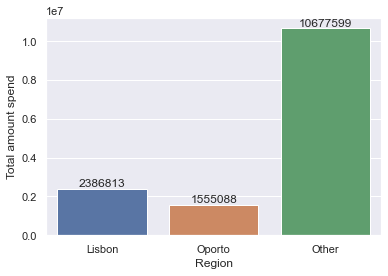

In [6]:
w2=wholesale.groupby('Region',as_index=False).sum()
w2['Total']=w2.Fresh+w2.Milk+w2.Grocery+w2.Frozen+w2.Detergents_Paper+w2.Delicatessen
rx=sns.barplot(x='Region',y='Total',data=w2)
plt.ylabel('Total amount spend');
plt.bar_label(rx.containers[0],fmt='%0.8g');

The region to spend most amount on the above items is others as it spents around 1.06cr, whereas Oporto Region spends around 15.5 lacs for the above items which is the least amount. 

#### Q-1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [7]:
w4=wholesale.groupby('Channel')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe()
w4


Fresh                                                               \
         count          mean           std   min      25%     50%       75%   
Channel                                                                       
Hotel    298.0  13475.560403  13831.687502   3.0  4070.25  9581.5  18274.75   
Retail   142.0   8904.323944   8987.714750  18.0  2347.75  5993.5  12229.75   

                    Milk                ... Detergents_Paper           \
              max  count          mean  ...              75%      max   
Channel                                 ...                             
Hotel    112151.0  298.0   3451.724832  ...            899.5   6907.0   
Retail    44466.0  142.0  10716.500000  ...           8662.5  40827.0   

        Delicatessen                                                         \
               count         mean          std  min     25%     50%     75%   
Channel                                                                       
Hotel          298.0  1415.956376  3147.426922  3.0  379.00   821.0  1548.0   
Retail         142.0  1753.436620  1953.797047  3.0  566.75  1350.0  2156.0   

                  
             max  
Channel           
Hotel    47943.0  
Retail   16523.0  

[2 rows x 48 columns]

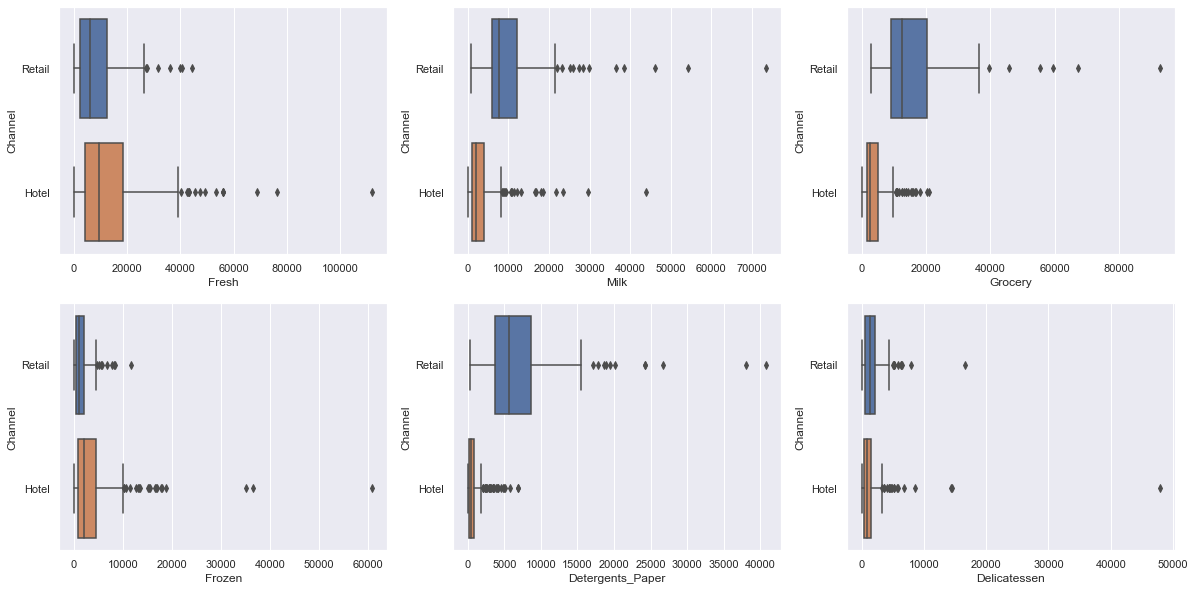

In [8]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
a=sns.boxplot(wholesale.Fresh,wholesale.Channel,ax=axes[0][0])
b=sns.boxplot(wholesale.Milk,wholesale.Channel,ax=axes[0][1])
c=sns.boxplot(wholesale.Grocery,wholesale.Channel,ax=axes[0][2])
d=sns.boxplot(wholesale.Frozen,wholesale.Channel,ax=axes[1][0])
e=sns.boxplot(wholesale['Detergents_Paper'],wholesale.Channel,ax=axes[1][1])
f=sns.boxplot(wholesale.Delicatessen,wholesale.Channel,ax=axes[1][2]);

#### Items Behavior Across Channel
1. Fresh item distribution is good, very slightly reight skewed in both hotel and Retail, CV value is low 0.97 and 0.99 respectively which means its very consistent.There are too many outliers as a huge difference in max and min with 3rd and 1st quartile respectively. Hotel channel has high value of outliers as compare to retail. 
2. Milk sale is more in retail channel in comparison to hotel channel. 1st quartile has large difference in both channels. Distributiion of milk in retail channel is right skewed ad has too many outliers, which means big amount of money has spent to buy milk through retail channels.
3. There is a big difference in spending of Grocery in both channels. Retail channel spends more as compare to hotel channel, distribution in both channels is positively skewed and both have outliers but retail channel has high value spending on grocery and outliers spreads much farther than the maximum value. 
4. Frozen items are more prefered through hotel channels, the spread is closely spread and a bit right skewed.There are some outliers in both channels but the Hotel Channel has high value outliers.
5. Spending on Detergent papers are much more in retail channel as compare to hotel channel.The spread of the item in retail channel is largely spread and ouliers contains high values whereas Hotel channel is closely spread and outliers also spread closely beyond maximum value.
6. Delicatessen item spending is almost similar in both channels and it is also closely spread. tin both channels it follows almost normal distribution. The ouliers value is much higher in Hotel as compare to Retail Channel.

In [9]:
w5=wholesale.groupby('Region')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe()
w5

Fresh                                                              \
        count          mean           std   min      25%     50%      75%   
Region                                                                      
Lisbon   77.0  11101.727273  11557.438575  18.0  2806.00  7363.0  15218.0   
Oporto   47.0   9887.680851   8387.899211   3.0  2751.50  8090.0  14925.5   
Other   316.0  12533.471519  13389.213115   3.0  3350.75  8752.5  17406.5   

                   Milk               ... Detergents_Paper           \
             max  count         mean  ...              75%      max   
Region                                ...                             
Lisbon   56083.0   77.0  5486.415584  ...          3593.00  19410.0   
Oporto   32717.0   47.0  5088.170213  ...          4324.50  38102.0   
Other   112151.0  316.0  5977.085443  ...          3875.75  40827.0   

       Delicatessen                                                         \
              count         mean          std   min    25%    50%      75%   
Region                                                                       
Lisbon         77.0  1354.896104  1345.423340   7.0  548.0  806.0  1775.00   
Oporto         47.0  1159.702128  1050.739841  51.0  540.5  898.0  1538.50   
Other         316.0  1620.601266  3232.581660   3.0  402.0  994.0  1832.75   

                 
            max  
Region           
Lisbon   6854.0  
Oporto   5609.0  
Other   47943.0  

[3 rows x 48 columns]

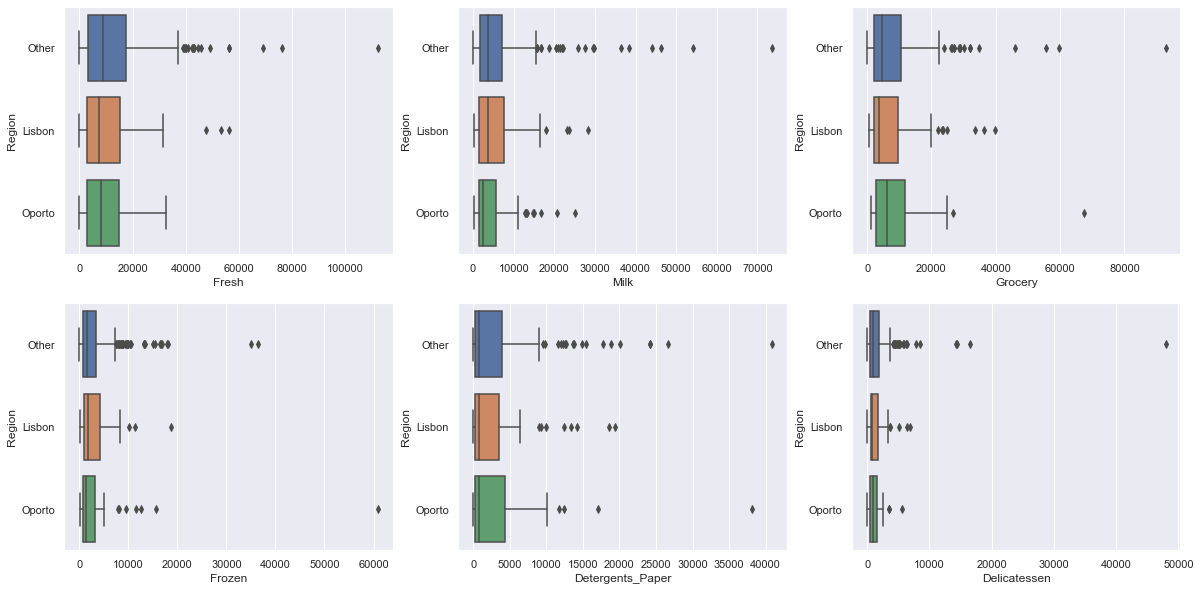

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
a=sns.boxplot(wholesale.Fresh,wholesale.Region,ax=axes[0][0])
b=sns.boxplot(wholesale.Milk,wholesale.Region,ax=axes[0][1])
c=sns.boxplot(wholesale.Grocery,wholesale.Region,ax=axes[0][2])
d=sns.boxplot(wholesale.Frozen,wholesale.Region,ax=axes[1][0])
e=sns.boxplot(wholesale['Detergents_Paper'],wholesale.Region,ax=axes[1][1])
f=sns.boxplot(wholesale.Delicatessen,wholesale.Region,ax=axes[1][2]);

#### Items Behavior Across Region
1. Fresh items are much more prefered in other region as complare to Lisbon and Oprto but there is not much difference in the spending.These distribution follow almost a normal distribution as they have vry little skewness. The Ouliers are high valued in other region than Lisbon and Oprto.
2. The spending of money on milk is much more higher in other region. The spread of variables is almost similar in lisbon and other region but Oprto is bit closely spread and right skewed. There are ouliers in all the region but highly and largely spread ouliers are in other region.
3. Grocery item are prefered in all three regions and bit Oporto has higher spending in all three. All three region has wide spread of data and the distributio is also a bit right skewed. Oprto mean spending is higher but the spread of ouliers is much wider in other area.
4. There is not much difference in spending of money to buy Frozen items in all three region.The data is closely spread in all three regions and distribution is right skewed. Other region has much more outliers as compare to other region.
5. For detergents paper customer spends more in other region but there are too many ouliers to affect the data. The distrbution of the data is wide spread and highly right skewed. Other region has much more spread in ouliers.
6. Delicatessen almost liked equaly by all three region . The data is closely spread and IQR is small for all three regions and there are wide spread outliers present in other region.

In [11]:
w6=wholesale.groupby(by=['Channel','Region'])[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe()
w6

Fresh                                                      \
                count          mean           std    min      25%     50%   
Channel Region                                                              
Hotel   Lisbon   59.0  12902.254237  12342.008901  514.0  4437.50  8656.0   
        Oporto   28.0  11650.535714   8969.362752    3.0  4938.25  9787.0   
        Other   211.0  13878.052133  14746.572913    3.0  3702.50  9612.0   
Retail  Lisbon   18.0   5200.000000   5415.521495   18.0  2378.25  2926.0   
        Oporto   19.0   7289.789474   6867.934548  161.0  2368.00  6468.0   
        Other   105.0   9831.504762   9635.394129   23.0  2343.00  7362.0   

                                    Milk                ... Detergents_Paper  \
                    75%       max  count          mean  ...              75%   
Channel Region                                          ...                    
Hotel   Lisbon  18135.0   56083.0   59.0   3870.203390  ...           874.00   
        Oporto  17031.5   32717.0   28.0   2304.250000  ...           707.00   
        Other   18821.0  112151.0  211.0   3486.981043  ...           948.50   
Retail  Lisbon   5988.0   20782.0   18.0  10784.000000  ...         11804.75   
        Oporto   9162.0   27082.0   19.0   9190.789474  ...          9837.50   
        Other   15076.0   44466.0  105.0  10981.009524  ...          7677.00   

                        Delicatessen                                           \
                    max        count         mean          std    min     25%   
Channel Region                                                                  
Hotel   Lisbon   5828.0         59.0  1197.152542  1219.945304    7.0  374.00   
        Oporto   1679.0         28.0  1105.892857  1056.778800   51.0  567.25   
        Other    6907.0        211.0  1518.284360  3663.183304    3.0  378.50   
Retail  Lisbon  19410.0         18.0  1871.944444  1626.486667  120.0  746.00   
        Oporto  38102.0         19.0  1239.000000  1065.438042   59.0  392.50   
        Other   40827.0        105.0  1826.209524  2119.052222    3.0  545.00   

                                         
                   50%     75%      max  
Channel Region                           
Hotel   Lisbon   749.0  1621.5   6854.0  
        Oporto   883.0  1146.0   5609.0  
        Other    823.0  1582.0  47943.0  
Retail  Lisbon  1414.0  2456.5   6372.0  
        Oporto  1037.0  1815.0   3508.0  
        Other   1386.0  2158.0  16523.0  

[6 rows x 48 columns]

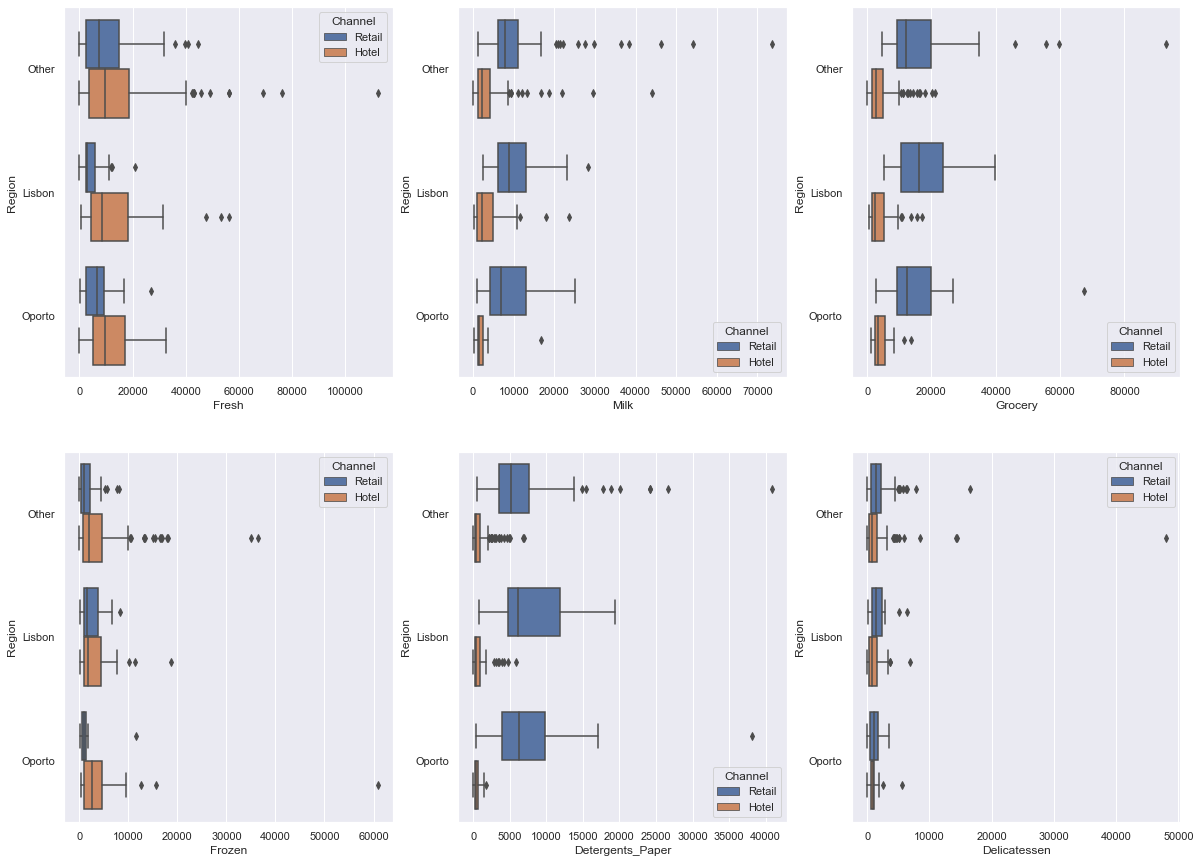

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,15)
a=sns.boxplot(wholesale.Fresh,wholesale.Region,hue=wholesale.Channel,ax=axes[0][0])
b=sns.boxplot(wholesale.Milk,wholesale.Region,wholesale.Channel,ax=axes[0][1])
c=sns.boxplot(wholesale.Grocery,wholesale.Region,wholesale.Channel,ax=axes[0][2])
d=sns.boxplot(wholesale.Frozen,wholesale.Region,wholesale.Channel,ax=axes[1][0])
e=sns.boxplot(wholesale['Detergents_Paper'],wholesale.Region,wholesale.Channel,ax=axes[1][1])
f=sns.boxplot(wholesale.Delicatessen,wholesale.Region,wholesale.Channel,ax=axes[1][2]);

####  Items Behavior Across Region and Channel
1. Fresh items are mostly prefered by Hotel Channels in all three regions. Their IQR is wide spread in all three regions and the distribution is a bit right skewed. The ouliers present in all three region but most widely spread in other region with high values.
2. Milk is mostly preferd by retail channels in all three regions. The spread of data is much wider in Oporto region as compare to others and there are no ouliers present in Oporto region which makes its more accurate as other and lisbon region has too many ouliers which can affect the mean spending.
3. Grocery is also Prefered by Retail channels in all three regions but Lisbon the region where customer spends the most. The spread of data is also wider in Lisbon and almost follow a noraml distribution.
4. Frozen items are prefered by Hotel channels in all three regions as their average spending is almost similar, but Oproto region is higher in all three and also follows almost normal distribution and closely spread data. there is ouliers present in the data for all three regions which can affect the mean and standard deviation.
5. Deterdent Paper has more spending by retail channels than hotel channels in all three regions , but the most spending is in Lisbon region. The data is wide spread in Lisbon region and its postively skewed. as there are ouliers present in other and oporto region that can affect is mean and standard deviation.
6. Average spending on Delicatessen are almost similar in both channels and in all three regions. Oporto is least spending area through hotel channel. All the data are closely spread. There is oultiers present in all the regions and Channels.

#### Q-1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [13]:
W_1=wholesale.describe()
W_1.loc[('CV'),:]= W_1.loc[('std'),:]/W_1.loc[('mean'),:]
W_1.drop('Buyer/Spender',axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
CV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


Based on the table and values of Coefficient of Variance (CV)
1. The item that shows most inconsistence behaviour is Delicatessen as it has highest CV value of 1.849407.
2. The item that shows least inconsistence behaviour is Fresh Items as it has the lowest CV value of 1.053918.

#### Q-1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

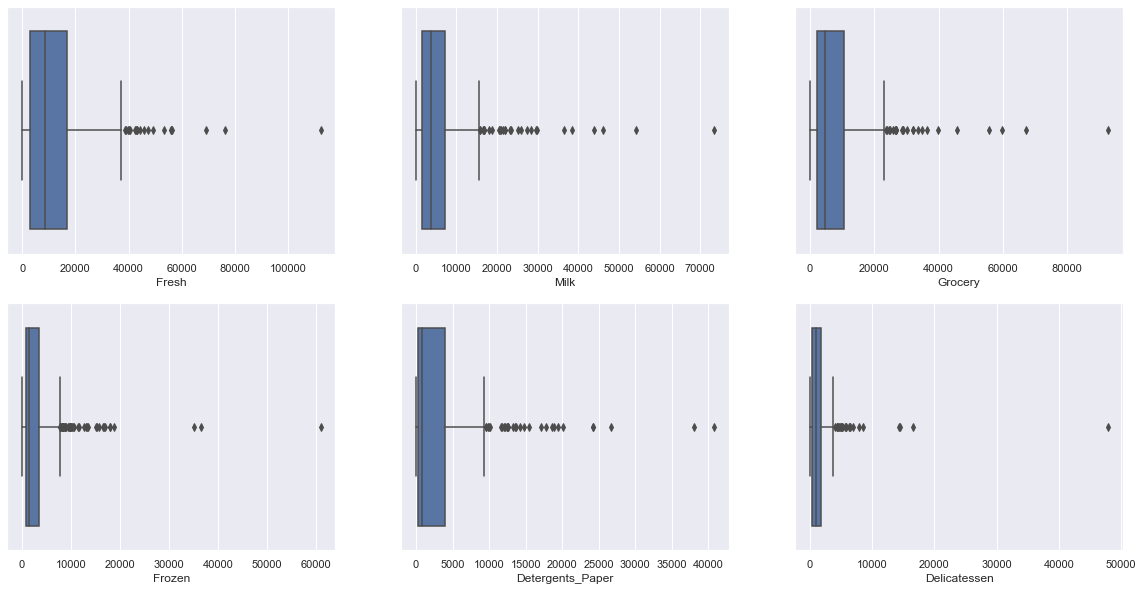

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
a=sns.boxplot(wholesale.Fresh,ax=axes[0][0])
b=sns.boxplot(wholesale.Milk,ax=axes[0][1])
c=sns.boxplot(wholesale.Grocery,ax=axes[0][2])
d=sns.boxplot(wholesale.Frozen,ax=axes[1][0])
e=sns.boxplot(wholesale['Detergents_Paper'],ax=axes[1][1])
f=sns.boxplot(wholesale.Delicatessen,ax=axes[1][2]);

#### Q-1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

On the analysis of the above data there are few recommendations that we can make,

There is a substantial difference in the sales of given 6 items in hotel and retail channels, those which has good sales in Hotel channels there is less sales in retail channels and vice versa. Like Fresh, Frozen these items have very good sales in hotel channels, but we can change the stratergies for the sales of these items in retail channels.we can find the root cause for such difference in sales for these items in both channels and change our stratergies according to that and than try to increase sales. Similarly with Milk, Grocery and detergent paper have a good sales in retail channels as compare to hotel channels. we can around the root cause for these and can try different stratergies and try to increase sales. 

# Problem 2

## Problem Statement
### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [3]:
survey=pd.read_csv('Survey-1.csv')
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [16]:
survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

#### Q-2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

###### 2.1.1. Gender and Major

###### 2.1.2. Gender and Grad Intention

###### 2.1.3. Gender and Employment

###### 2.1.4. Gender and Computer

In [17]:
# 2.1.1
ct1=pd.crosstab(survey['Gender'],survey['Major'])
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [18]:
# 2.1.2
ct2=pd.crosstab(survey['Gender'],survey['Grad Intention'])
ct2


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [19]:
#2.1.3
ct3=pd.crosstab(survey['Gender'],survey['Employment'])
ct3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [20]:
# 2.1.4
ct4=pd.crosstab(survey['Gender'],survey['Computer'])
ct4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


#### Q-2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

###### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

###### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [21]:
survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [22]:
# 2.2.1
print("The probability that a randomly selected CMSU student will be male is {:0.2%}".
      format(survey['Gender'].value_counts().values[1]/len(survey.Gender)))

The probability that a randomly selected CMSU student will be male is 46.77%


In [23]:
# 2.2.2
print("The probability that a randomly selected CMSU student will be Female is {:0.2%}".
      format(survey['Gender'].value_counts().values[0]/len(survey.Gender)))

The probability that a randomly selected CMSU student will be Female is 53.23%


#### Q-2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

###### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

###### 2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [24]:
S1=pd.DataFrame(columns=ct1.columns,index=None)
S1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided


In [25]:
# 2.3.1
i=ct1.iloc[1,:]
b=ct1.iloc[1,:].sum()
a=round(i/b,2)*100
S2=S1.append(i)
S3=S2.append(a,"Probability")
S3


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
0,4,1,4,2,6,4,5,3
1,14.0,3.0,14.0,7.0,21.0,14.0,17.0,10.0


In [26]:
# 2.3.2
for i in ct1:
    i=ct1.iloc[0,:]
    b=ct1.iloc[0,:].sum()
    a=round(i/b,2)*100
    S4=S1.append(i)
    S5=S4.append(a,'Probability')
S5

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
0,3,3,7,4,4,3,9,0
1,9.0,9.0,21.0,12.0,12.0,9.0,27.0,0.0


#### Q-2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

###### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

###### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [27]:
# 2.4.1
print('The probability That a randomly chosen student is a male {} and intends to graduate is {:0.2%}'.
      format(ct2.iloc[1,2],ct2.iloc[1,2]/62))

The probability That a randomly chosen student is a male 17 and intends to graduate is 27.42%


In [28]:
# 2.4.2
print('The probability that a randomly selected student is a female and does NOT have a laptop is {:0.2%}'.
      format((ct4.iloc[0,:].sum()-ct4.iloc[0,1])/62))

The probability that a randomly selected student is a female and does NOT have a laptop is 6.45%


#### Q- 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

###### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

###### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [29]:
#2.5.1
print('P(M)=29/62=',(29/62))
print('P(FE)=10/62=',(10/62))
print('P(M ∩ FE)=',(7/62))
print('P(M or FE) = P(M)+P(FE)-P(M ∩ FE)')
print(" ")

print('The probability that a randomly chosen student is a male or has full-time employment is {}'.format((0.468+0.161)-0.113))

P(M)=29/62= 0.46774193548387094
P(FE)=10/62= 0.16129032258064516
P(M ∩ FE)= 0.11290322580645161
P(M or FE) = P(M)+P(FE)-P(M ∩ FE)
 
The probability that a randomly chosen student is a male or has full-time employment is 0.516


In [30]:
#2.5.2
print('P(International Business or Managment| Female)')
x=(ct1.iloc[0,3]/ct1.iloc[0,:].sum())+(ct1.iloc[0,4]/ct1.iloc[0,:].sum())
print('P(A)= Probability of a female')
print('P(B)=Probability of International business or managment')
print('P(B|A)=probability of International business or managment given a female')
print('P(B|A)= P(A ∩ B)/P(A)')
print('')
print('The conditional probability that given a female student is randomly chosen, she is majoring in'
      '\ninternational business or management is.',round(x*100,2),'%')

P(International Business or Managment| Female)
P(A)= Probability of a female
P(B)=Probability of International business or managment
P(B|A)=probability of International business or managment given a female
P(B|A)= P(A ∩ B)/P(A)

The conditional probability that given a female student is randomly chosen, she is majoring in
international business or management is. 24.24 %


#### Q-2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [31]:
ct2.drop('Undecided',axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


Graduate Intention is yes = GI

Female = F

P(GI ∩ F)= P(GI) * P(F)

For graduate intention and being female are independent events this above condition should be satisfy so,

P(GI)= 28/40 = 0.7

P(F) = 20/40 = 0.5

P(GI) * P(F) = 0.7 * 0.5 = 0.35

P(GI ∩ F) = 11/40 = 0.275

As we can check these are not independent events as probability multiplication of both events is not equal to combined event, so being a Graduate Intention and being female candidate are not independent events.

#### Q-2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

##### Answer the following questions based on the data

###### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

###### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.


In [32]:
# 2.7.1
survey[survey['GPA']<3]['Gender'].count()
print('If a student is chosen randomly,The probability that his/her GPA is less than 3 is',round(17/62*100,2),'%')

If a student is chosen randomly,The probability that his/her GPA is less than 3 is 27.42 %


In [33]:
#2.7.2
survey[(survey['Gender']=='Male') & (survey['Salary']>=50)]['Gender'].count()
survey[(survey['Gender']=='Female') & (survey['Salary']>=50)]['Gender'].count()
print('The conditional probability that a randomly selected male earns 50 or more is',
      round(survey[(survey['Gender']=='Male') & (survey['Salary']>50)]['Gender'].count()/29*100,2),'%')
print('')
print('The conditional probability that a randomly selected female earns 50 or more is',
      round(survey[(survey['Gender']=='Female') & (survey['Salary']>50)]['Gender'].count()/33*100,2),'%')

The conditional probability that a randomly selected male earns 50 or more is 34.48 %

The conditional probability that a randomly selected female earns 50 or more is 39.39 %


#### Q-2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

#### Q 2.8.2 Write a note summarizing your conclusions

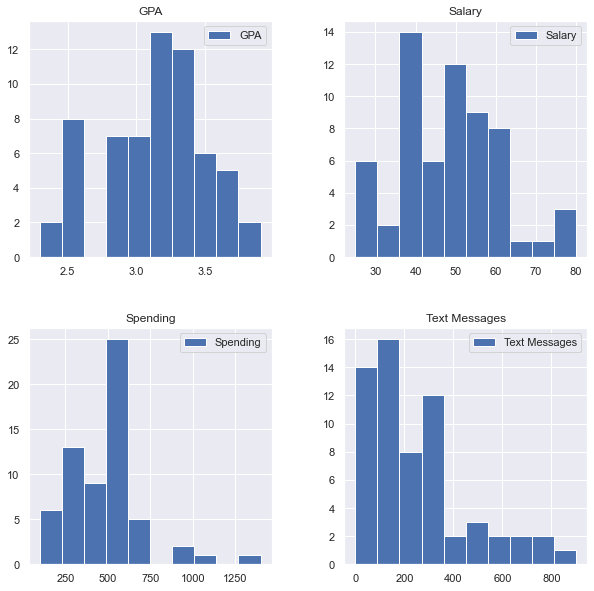

In [34]:
survey[['GPA','Salary','Spending','Text Messages']].hist(figsize=(10,10),legend=True);

In [35]:
print('Skewness of GPA =',stats.skew(survey.GPA))
print('Skewness of Salary =',stats.skew(survey.Salary))
print('Skewness of Spending =',stats.skew(survey.Spending))
print('Skewness of Text Messages =',stats.skew(survey['Text Messages']))

Skewness of GPA = -0.3069370607018797
Skewness of Salary = 0.5216766008645851
Skewness of Spending = 1.5472850312929523
Skewness of Text Messages = 1.2642446834439687


As we can see from the plots and stats that
1. GPA is almost normaly distributed as it has very slight skewness
2. Salary is a bit right or positvely skewed
3. Spending is highly skewed towards riht or positive side.
4. Text messages also highly right skewed.

In [4]:
f1,p1=stats.shapiro(survey.GPA)
f2,p2=stats.shapiro(survey.Salary)
f3,p3=stats.shapiro(survey.Spending)
f4,p=stats.shapiro(survey['Text Messages'])
print(f1,p1,'\n',f2,p2,'\n',f3,p3,'\n',f4,p4)

NameError: name 'f4' is not defined

In [36]:
print('Mean of GPA =',survey['GPA'].mean(),'\nMedian of GPA =',survey.GPA.median(),'\nMode of GPA =',survey.GPA.mode())
print('Mean of Salary =',survey['Salary'].mean(),'\nMedian of Salary =',survey.Salary.median(),'\nMode of Salary =',survey.Salary.mode())
print('Mean of Spending =',survey['Spending'].mean(),'\nMedian of Spending =',survey.Spending.median(),'\nMode of Spending =',survey.Spending.mode())
print('Mean of Text Messages =',survey['Text Messages'].mean(),'\nMedian of Text Messages =',survey['Text Messages'].median(),'\nMode of Text Messages =',survey['Text Messages'].mode())

Mean of GPA = 3.129032258064516 
Median of GPA = 3.1500000000000004 
Mode of GPA = 0    3.0
1    3.1
2    3.4
dtype: float64
Mean of Salary = 48.54838709677419 
Median of Salary = 50.0 
Mode of Salary = 0    40.0
dtype: float64
Mean of Spending = 482.01612903225805 
Median of Spending = 500.0 
Mode of Spending = 0    500
dtype: int64
Mean of Text Messages = 246.20967741935485 
Median of Text Messages = 200.0 
Mode of Text Messages = 0    300
dtype: int64


As we can see ,

For GPA Mean , median  and mode is almost similar so we can can say it follows a normal distribution, for the rest three Salary , Spending and Text Messages has substantial differences in their mean, median and mode so we can say they dont a normal distribution.

##### 2.8.2
Conclusion,

As we studied the survey data we can say few things about the survey that, there are more number of males who intends to graduate as compare to female, As among females lot of them is still undecided whether to graduate or not. studendts who intends to graduate most liked stream to major from amoing males is Management and Retail/Marketing and among females its Retail/marketing and Economics/finance, so we ca say among all students who intends to graduate most liked major is Retail/Marketing. Around 85% of students are working and most of them prefer part-time jobs and uses laptop instead of dekstop or tablet. Among male students who earns good salary(more than or equal to 50) most of them have intention to graduate where as  high paid working females(more than or equal to 50) have mixed feeling about Graduate intention.

Problem 3

## Problem Statement
### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
1. The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

#### Q-3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [37]:
shing=pd.read_csv('A+&+B+shingles.csv')
shing.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


### Step 1 - Hypothesis

1. Null Hypothesis-$H_0$-  $\mu$ = mean weight of shingles is 0.35 per 100 square feet
2. Alternative Hypothesis - $H_A$- $\mu$ > mean wieught of shingles 0.35 per 100 square foot

### Step 2 - Significance Level $\alpha$

alpha ($\alpha$) = 0.05

Checking the hypothesis at 5 % significance level


### Step - 3 Identifying $t_{stat}$ for A and B samples

As n is larger than 30 in both cases but population standard deviation is not given

$t_{stat}$= $X_{bar}$-$\mu$/($\sigma$/sqrt(n))

### Step 4 : Calculating tstat and p value

In [38]:
# for shingles A
tstat1,p_value1=ttest_1samp(shing['A'],0.35)
p_value1=p_value1/2
print('tstat1 =',tstat1)
print('p value1 =',p_value1)
# For shingles B
tstat2,p_value2=ttest_1samp(shing['B'],0.35,nan_policy='omit')
pvalue2=p_value2/2
print('tstat2 =',tstat2)
print('p value2 =',pvalue2)

tstat1 = -1.4735046253382782
p value1 = 0.07477633144907513
tstat2 = -3.1003313069986995
p value2 = 0.0020904774003191826


### Step 5 : Decide wether to Reject or Accept the null Hypotheis

In [39]:
# For sample A
alpha=0.05
if p_value1< alpha:
    print('We Reject the Null hypothesis' 
          '\nThe mean moisture weight of shingles in sample A is less than 0.35 per 100 square feet')
else:
    print('We fail to Reject the Null Hypotheis' 
          '\nThe mean weight of shingles in sample A is not greater than 0.35 per 100 square feet')


We fail to Reject the Null Hypotheis
The mean weight of shingles in sample A is not greater than 0.35 per 100 square feet


In [40]:
# For sample B
alpha=0.05
if pvalue2< alpha:
    print('We Reject the Null hypothesis \nThe mean weight of shingles in sample B is less than 0.35 per 100 square feet')
else:
    print('We fail to Reject the Null Hypotheis' 
          '\nThe mean weight of shingles in sample B is not less than 0.35 per 100 square feet')

We Reject the Null hypothesis 
The mean weight of shingles in sample B is less than 0.35 per 100 square feet


#### Q-3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Step 1 - Hypothesis

1. Null Hypothesis-  $\mu _A$ = $\mu _B$
2. Alternative Hypothesis - $\mu _A$ != $\mu _B$

### Step 2 - Significance Level $\alpha$

alpha ($\alpha$) = 0.05

Checking the hypothesis at 5 % significance level

### Step - 3 Identifying $t_{stat}$ for A and B samples




In [41]:
tstat,pvalue = ttest_ind(shing.A,shing.B,nan_policy='omit')
print('tstat =',tstat)
print('pvalue =',pvalue)

tstat = 1.2896282719661123
pvalue = 0.2017496571835306


#### Step 4 : Calculating tstat and p value

In [42]:
pvalue 

0.2017496571835306

#### Step 5 : Conclusion

In [43]:
alpha = 0.05
if pvalue < alpha:
    print('We reject the null hypothesis \nThe mean weight of both samples is not equal')
else:
    print('We fail to reject the null hypothesis \nThe mean weight of the samples is equal')

We fail to reject the null hypothesis 
The mean weight of the samples is equal


##### Assumptions need to check before the test,
1. Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
2. Data in each group must be obtained via a random sample from the population.
3. Data in each group are normally distributed.
4. Data values are continuous.
5. The variances for the two independent groups are equal.